In [1]:
using Interact, Plots, DifferentialEquations, LinearAlgebra
using NonLinearDynamicsCourse

WebIO._IJuliaInit()

# Ecuaciones diferenciales lineales en 2D


Para el caso en el que campo vector esté dado por funciones lineales podemos escribir de forma general:

$\dot{x} = ax+by$

$\dot{y} = cx+dy$

O de forma mas compacta usando notacion matricial

$\bf{\dot{u}} = {\bf Au}$

donde

${\bf u} = \begin{pmatrix}x\\y\end{pmatrix}\quad{\bf A} =\begin{pmatrix}a & b\\c & d\end{pmatrix}$

Cualquier termino constante que se agregue a la forma anterior se puede eliminar haciendo un cambio **lineal** de coordenadas. Por lo tanto decimos que esta es la forma general de un flujo 2D lineal, con un único punto fijo en el origen.


## Caso A diagonal

Como va a ser el comportamiento del flujo dependiendo de la matriz $A$? 

Veamos el caso mas simple, el de una matriz diagonal:

${\bf A} =\begin{pmatrix}a & 0\\0 & d\end{pmatrix}$

que corresponde a dos sistemas 1D desacoplados:

$\dot{x} = ax$

$\dot{y} = dy$

En este caso sabemos cómo es el flujo sobre el eje $x$ y sobre el eje $y$, porque no es mas que la combinación de dos flujos lineales 1D independientes. Vamos a tener un atractor o un repulsor dependiendo del signo de $a$ para el eje horizontal y de $d$ para el eje vertical. Más aun, conocemos la solución general: $x(t)=x_0 e^{at}$ y $y(x)=y_0 e^{dt}$. El flujo en el plano para una condición inicial $(x_0,y_0)$ no es mas que la composicion de ambos flujos, como puede verse de integrar el sistema para el caso de ambos atractores ($a=-1$,$d=-2$):


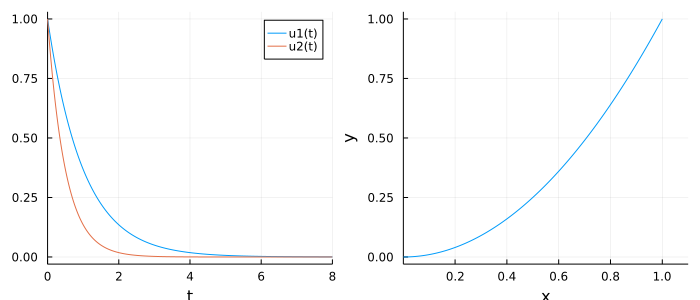

In [2]:
function node1!(du,u,p,t)
    du[1] = -u[1]
    du[2] = -2.0*u[2]
    return 
end    

sol = solve(ODEProblem(node1!, [1.0,1.0], (0,8.0)))
p1=plot(sol)
p2=plot(sol,vars=(1,2),legend=false,xlabel="x",ylabel="y")
plot(p1,p2,layout=(1,2),size=(700,300),fmt=:png)

En el grafico de la derecha tenemos la evolución temporal (decaimiento exponencial) de las variables $x$(azul) e $y$(naranja) que como usamos el plot por defecto de `DifferentialEquations` aparecen como $u1$ y $u2$. A la derecha la trayectoria en el espacio de fases desde la condición inicial, que está curvada porque decae el doble de rapido en $y$ que en $x$ (recordar que elegimos $d$ con un valor que es el doble que el de $a$). 

Cualquier otra condición inicial va a decaer al punto fijo siguiendo una curva similar como podemos ver de resolver un Ensemble de condiciones inciales rodeando el origen (la forma particular del $u0\_array$ es para crear un circulo de condiciones inciales en torno al origen).

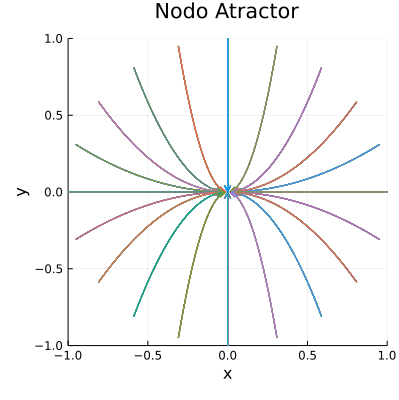

In [4]:
u0_arr = vec([[cos(i*pi/10);sin(i*pi/10)] for i=1:20, j=1:20])
prob = ODEProblem(node1!, u0_arr[1], (0,3.0))
function prob_func(prob,i,repeat)
  remake(prob,u0=u0_arr[i])
end
sol = solve(EnsembleProblem(prob,prob_func=prob_func),
    EnsembleThreads(),trajectories=length(u0_arr))
plot(sol,vars=(1,2),arrows=true,legend=false,xlabel="x",ylabel="y",
    size=(400,400),fmt=:png,title="Nodo Atractor")

Usamos flechas en las trayectorias para indicar el sentido del flujo. Vamos a ver más adelante que podemos clasificar los puntos fijos por la forma en que el flujo se aproxima o se aleja de él. En este caso el punto fijo en el origen es un **nodo atractor**.


Como puede verse hay dos direcciones particulares en las que el flujo sigue una linea recta, que son las del eje $x$ e $y$. No hay nada sorprendente en eso porque sobre esas direcciones sólo está actuando una sola de las ecuaciones diferenciales y la otra variable siempre es cero. Sin embargo más tarde vamos a generalizar esa propiedad y la vamos a llamar la **auto-dirección** o la dirección del **autovector** y va a corresponder a **rectas que pasan por el punto fijo para las cuales todas las condiciones iniciales sobre ella permanecen en la recta para todo tiempo**. 

Vamos a avanzar más aun en este caso trivial y vamos a notar que si pasamos a la notación matricial, cualquier punto del espacio de fases evoluciona con la matriz

${\bf \dot{u}} = \begin{pmatrix}-1 & 0\\0 & -2\end{pmatrix}\begin{pmatrix}x\\y\end{pmatrix}=\begin{pmatrix}-x\\-2y\end{pmatrix}$

Para este caso particular donde el punto fijo está en el origen, las **autodirecciones** van a estar dada por aquellos vectores $\bf{u}$ que al multiplicarlos por $\bf{A}$ apunten en la misma dirección que ellos mismos (de ahi lo de "auto"). Podemos verificar que cualquier vector que esté en la dirección del eje $x$:

$\begin{pmatrix}-1 & 0\\0 & -2\end{pmatrix}\begin{pmatrix}k\\0\end{pmatrix}=\begin{pmatrix}-k\\0\end{pmatrix}$

donde $k$ es un número real cualquiera, es igual a si mismo multiplicado por $-1$. Y que para cualquier vector que esté en la dirección $y$:

$\begin{pmatrix}-1 & 0\\0 & -2\end{pmatrix}\begin{pmatrix}0\\k\end{pmatrix}=\begin{pmatrix}0\\-2k\end{pmatrix}$

es igual a sí mismo multiplicado por $-2$ y se puede probar que son las únicas dos direcciones para las que sucede eso. 

Lo que acabamos de hacer, para el caso más sencillo posible es mostrar que para una matriz $\bf{A}$ es posible encontrar dos vectores diferentes $\bf{u}$, que vamos a llamar **autovectores**,  tales que multiplicados a derecha por esa matriz son iguales a sí mismos multiplicados por una constante $\lambda$ que vamos a llamar **autovalor**.

$\bf{A}\bf{u} = \lambda\bf{u}$

La interpretación geométrica es que el autovector representa una dirección en el plano (por eso esta definido a menos de un factor $k$ arbitrario) para la cual el efecto de multiplicar por $\bf{A}$ es justamente **no afectar su dirección**. 

Y en términos de nuestro sistema dinámico lineal la interpretación más relevante es que para los puntos sobre esa dirección la flecha del campo vector está alineada con la dirección que los une al punto fijo (motivo por el cual siguen evolucionando sobre esa recta). El hecho que los autovalores sean negativos implica que (sobre esa dirección) el campo vector va a apuntar hacia el origen (tiene el signo contrario que la coordenada), con lo cual está claro el por qué se trata de un nodo atractor. Esto se puede ver rapidamente en el aspecto del campo vector:

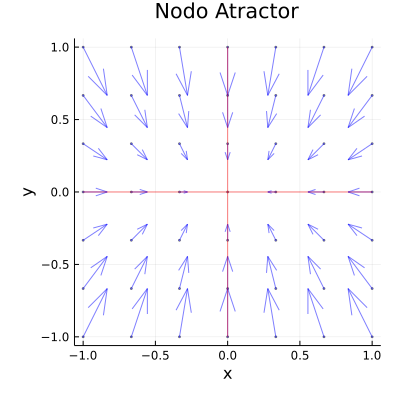

In [5]:
p1=flux2d_vectorfield(node1!,[0.0],npts=7)
plot!(p1,[-1,1],[0,0],c=:red,alpha=0.5)
plot!(p1,[0,0],[-1,1],c=:red,alpha=0.5,size=(400,400),fmt=:png,title="Nodo Atractor")

También de esto sigue que si ambos autovalores fuesen positivos (seguimos pensando en el caso particular en el que la matriz es diagonal) se va a tratar de un **nodo repulsor**. 

El ejemplo anterior para autovalores $-1$ y $-2$ se puede generalizar para cualquier matriz diagonal con valores arbitrarios sobre la misma. La vamos a escribir de la siguiente forma:

${\bf A} =\begin{pmatrix}\lambda_1 & 0\\0 & \lambda_2\end{pmatrix}$

Donde por ahora asumimos $\lambda_1 \neq \lambda_2$ y ambos valores diferentes de cero. Se puede ver que este caso los autovectores siguen siendo los mismos ya que:


${\bf A}\bf{v_1} =\begin{pmatrix}\lambda_1 & 0\\0 & \lambda_2\end{pmatrix}\begin{pmatrix}1\\0\end{pmatrix}=\begin{pmatrix}\lambda_1\\0\end{pmatrix}=\lambda_1 \bf{v_1}$

${\bf A}\bf{v_2} =\begin{pmatrix}\lambda_1 & 0\\0 & \lambda_2\end{pmatrix}\begin{pmatrix}0\\1\end{pmatrix}=\begin{pmatrix}0\\ \lambda_2\end{pmatrix}=\lambda_2 \bf{v_2}$

donde, como antes, los autovectores $\bf{v}$ indican la dirección de la recta sobre la cual todos los puntos $k \bf{v}$ evolucionen siguiendo esa misma recta (la recta es una trayectoria en el espacio de fases). 

A partir de ahora no vamos a escribir más la solución analítica, pero conviene recordar que un sistema dinámico lineal con una matriz diagonal las soluciones toman la forma sencilla:

$x(t)=x_0 e^{\lambda_1 t} $

$y(t)=y_0 e^{\lambda_2 t} $

Más adelante vamos a aplicar transformaciones de coordenadas para llevar un sistema lineal más general a la forma diagonal, para la cual ya conocemos la solución exacta. 

### Punto silla

Si ambos autovalores son negativos tenemos un nodo atractor y si ambos son positivos un nodo repulsor. Qué sucede si un autovalor es positivo y el otro negativo? Veamos primero el retrato de fases

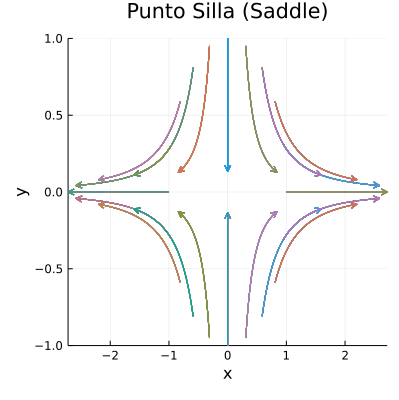

In [6]:
function saddle1!(du,u,p,t)
    du[1] = u[1]
    du[2] = -2.0*u[2]
    return 
end    

prob = ODEProblem(saddle1!, u0_arr[1], (0,1.0))
sol = solve(EnsembleProblem(prob,prob_func=prob_func),
    EnsembleThreads(),trajectories=length(u0_arr))
plot(sol,vars=(1,2),arrows=true,legend=false,xlabel="x",ylabel="y",
    size=(400,400),fmt=:png,title="Punto Silla (Saddle)")

En este caso el autovalor en la dirección $y$  sigue siendo negativo y el flujo es atraído hacia el punto fijo en esa dirección, pero en la dirección $x$ es positivo y el flujo es repelido hacia los costados. Tenemos entonces un **punto silla** o **saddle**. Notar que para las trayectorias fuera del las autodirecciones el flujo es atraído en la direccion $y$ hacia el eje horizontal y expulsado en la dirección $x$ alejandose (exponencialmente) del eje vertical. 

A su vez la autodirección atractora funciona como una **separtatiz** o "divisoria de aguas" que organiza el flujo. Las condiciones iniciales que se encuentren de un lado o del otro de esta separatriz tienen destinos distintos (en este caso ir a $+\infty$ o a $-\infty$ en el eje horizontal). Como vamos a ver, esta característica de la dirección atractora del punto silla como organizadora del flujo también se puede generalizar.

En sistemas de dos o mas dimensiones los puntos silla uno de los grandes organizadores del flujo. En los sistemas no-lineales 2D las separatrices ya no son mas rectas sino curvas que se conocen con el nombre de **variedades**.

## Caso A simétrica. Rotación

Pero qué sucede en el caso general de una matriz no diagonal? 

Y son los tres tipos de puntos fijos que vimos hasta ahora (nodo atractor, nodo repulsor y punto silla) los únicos posibles? 

Desde el punto de vista del álgebra lineal una matriz puede interpretarse como una transformación lineal en el plano. Una transformación relativamente sencilla y que es posible sólo si la matriz es simétrica es la rotación. Vamos a comenzar por ese caso antes de ir al más general. Si tenemos la matriz simétrica:

${\bf A} =\begin{pmatrix}-3 & 1\\1 & -3\end{pmatrix}$



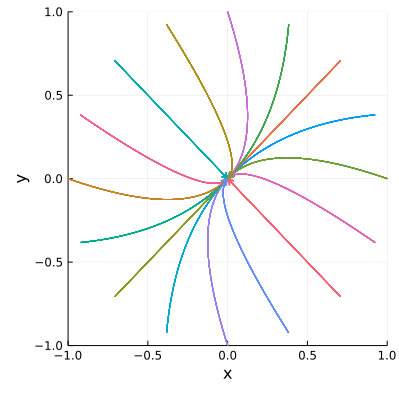

In [7]:
function node2!(du,u,p,t)
    du[1] = -3*u[1]+u[2]
    du[2] = u[1]-3*u[2]
    return 
end    

u0_arr = vec([[cos(i*pi/8);sin(i*pi/8)] for i=1:16, j=1:16])
prob = ODEProblem(node2!, u0_arr[1], (0,3.0))
sol = solve(EnsembleProblem(prob,prob_func=prob_func),
    EnsembleThreads(),trajectories=length(u0_arr))
plot(sol,vars=(1,2),arrows=true,legend=false,xlabel="x",ylabel="y",
    size=(400,400),fmt=:png)

Podemos ver que sigue habiendo dos autodirecciones definidas pero que ahora están rotadas 45 grados. Los autovectores en este caso serian:

$\bf{v_1} = \begin{pmatrix}1\\-1\end{pmatrix}\quad\bf{v_2} = \begin{pmatrix}1\\1\end{pmatrix}$ 

Para verificar que en verdad lo son y de paso obtener los autovalores los multiplicamos a derecha por $\bf{A}$ :

${\bf A}\bf{v_1} =\begin{pmatrix}-3 & 1\\1 & -3\end{pmatrix}\begin{pmatrix}1\\-1\end{pmatrix}=\begin{pmatrix}-4\\4\end{pmatrix}=-4 \bf{v_1}$

${\bf A}\bf{v_2} =\begin{pmatrix}-3 & 1\\1 & -3\end{pmatrix}\begin{pmatrix}1\\1\end{pmatrix}=\begin{pmatrix}-2\\-2\end{pmatrix}=-2 \bf{v_1}$

Es decir que los autovalores de $\bf{A}$ son $\lambda_1=-4$ y $\lambda_2=-2$, por mas que no esté escrita de forma diagonal. 

Como información adicional, para quienes hayan visto algo de álgebra lineal. Si armamos una matriz $\bf{T}$ usando los autovectores normalizados como columnas:

$\bf{T}=\displaystyle\frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1\\-1 & 1\end{pmatrix}$

cuya inversa (por ser una matriz ortogonal) es igual a la matriz armada con los autovectores como filas:

$\bf{T}^{-1}=\displaystyle\frac{1}{\sqrt{2}}\begin{pmatrix}1 & -1\\1 & 1\end{pmatrix}$

y las multiplicamos izquierda y a derecha por la matriz original $\bf{A}$ el resultado es la matriz diagonalizada:

$\bf{T}^{-1}\bf{A}\bf{T} =\displaystyle\frac{1}{2}\begin{pmatrix}1 & -1\\1 & 1\end{pmatrix}\begin{pmatrix}-3 & 1\\1 & -3\end{pmatrix}\begin{pmatrix}1 & 1\\-1 & 1\end{pmatrix}=\begin{pmatrix} -4 & 0\\0 & -2\end{pmatrix}$

Este proceso se conoce como **diagonalización** de la matriz $\bf{A}$.

El resultado más importante es la **interpretación geométrica de la matriz $\bf{T}$ como una transformación lineal de coordenadas en el espacio de fases que me diagonaliza el sistema dinámico** y me lo transforma en el caso más simple que vimos al principio. 

Vamos a aplicar la transformacion al sistema dinámico para que quede mas claro. Si partimos de la ecuación original:

$\begin{pmatrix}\dot{x}\\\dot{y}\end{pmatrix} = {\bf A}\begin{pmatrix}x\\y\end{pmatrix}$

y aplicamos el siguiente cambio de coordenadas con su inverso:

$\begin{pmatrix}\chi\\\xi\end{pmatrix} = \bf{T^{-1}}\begin{pmatrix}x\\y\end{pmatrix}$

$\begin{pmatrix}x\\y\end{pmatrix} = \bf{T}\begin{pmatrix}\chi\\\xi\end{pmatrix}$

Podemos escribir el sistema en las nuevas coordenadas como 

$\bf{T}\begin{pmatrix}\chi\\\xi\end{pmatrix} = {\bf AT}\begin{pmatrix}\chi\\\xi\end{pmatrix}$

Multiplicando a izquierda por la inversa y usando el resultado de la diagonalizacion obtenemos

$\begin{pmatrix}\chi\\\xi\end{pmatrix} = {\bf T^{-1}AT}\begin{pmatrix}\chi\\\xi\end{pmatrix} = \begin{pmatrix}\lambda_1 & 0 \\0 & \lambda_2 \end{pmatrix}\begin{pmatrix}\chi\\\xi\end{pmatrix}$

Este resultado es general para cualquier matriz $A$ diagonalizable

En este caso particular la transformación lineal corresponde a una rotación de los ejes en 45 grados. De hecho, la acción de la matriz $\bf{T}$ sobre cualquier punto en el plano es la de rotarlo 45 grados en sentido horario en torno al origen. 

Para verificar que la transformación lineal me diagonaliza el problema vamos a hacer un cambio de variables de nuestro sistema original: 

$\begin{pmatrix}\dot{x}\\ \dot{y}\end{pmatrix} = \begin{pmatrix}-3 & 1\\1 & -3\end{pmatrix}\begin{pmatrix}x\\y\end{pmatrix} \quad {\displaystyle{\dot{x} = -3x + y}\atop\displaystyle{\dot{y} = x - 3y}}$

a unas nuevas variables obtenidas mediante la transformacion  $\bf{T^{-1}}$:

$\begin{pmatrix}\chi\\ \xi\end{pmatrix} = \begin{pmatrix}1 & -1\\1 & 1\end{pmatrix}\begin{pmatrix}x\\y\end{pmatrix} \quad {\displaystyle{\chi = x - y}\atop\displaystyle{\xi = x + y}}$

El nuevo sistema queda:

$\dot{\chi}=\dot{x}-\dot{y}=-4x+4y=-4\chi$

$\dot{\xi}= \dot{x}+\dot{y}=-2x-2y=-2\xi$

Y tenemos las ecuaciones desacopladas para ($\chi,\xi$) como en el primer caso de la matrix diagonal. Como conocemos la solución analítica podemos obtener ($\chi(t),\xi(t)$) y la solucion del problema original puede obtenerse haciendo la transformacion inversa de coordenadas con $\bf{T}$:

$\begin{pmatrix}x\\y\end{pmatrix} = \begin{pmatrix}1 & 1\\-1 & 1\end{pmatrix}\begin{pmatrix}\chi\\ \xi \end{pmatrix}$

Sin embargo no nos vamos a complicar por ahora con la solución analítica y vamos a continuar con otro ejemplo de una matriz no simétrica.

## Caso A General. Diagonalización

Vamos a ver dos ejemplos más que muestran transformaciones lineales un poco más generales que una rotación.

El primero es el sistema dinámico lineal definido por matriz:

${\bf A} =\begin{pmatrix}-3 & 2\\-2 & 2\end{pmatrix}$

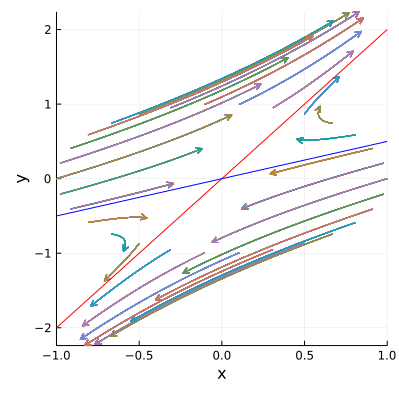

In [8]:
function saddle2!(du,u,p,t)
    du[1] = -3*u[1]+2*u[2]
    du[2] = -2*u[1]+2*u[2]
    return 
end    

u0_arr = vec([[cos(i*pi/15);sin(i*pi/15)] for i=1:30, j=1:30])
prob = ODEProblem(saddle2!, u0_arr[1], (0,0.5))
sol = solve(EnsembleProblem(prob,prob_func=prob_func),
    EnsembleThreads(),trajectories=length(u0_arr))
p1 = plot(sol,vars=(1,2),arrows=true,legend=false,xlabel="x",ylabel="y",
    size=(400,400))
plot!(p1,[-1,1],[-2,2],c=:red)
plot!(p1,[-1,1],[-0.5,0.5],c=:blue,fmt=:png)

Si bien no hay ninguna condición inicial que siga exactamente la autodirección hay algunas muy cercanas y se puede ver que las dos lineas continuas (trazadas después) corresponen a los autovectores de un punto silla, con la autodireccion atractora en azul y la repulsora en rojo. De hecho el retrato de fase corresponde a una transformación lineal del punto silla del sistema diagonal anterior que daba un punto silla, con un autovalor positivo y el otro negativo, donde el eje $y$ de transformó en la recta azul y el eje $x$ en la recta roja. Cuando la matriz no es simétrica las autodireciones no son perpendiculares entre si y los puntos silla tienen de forma general este aspecto "torcido"

Los autovectores y autovalores de este sistema son:

${\bf A}\bf{v_1}=\begin{pmatrix}-3 & 2\\-2 & 2\end{pmatrix}\begin{pmatrix}1\\1/2\end{pmatrix}=\begin{pmatrix}-2\\1\end{pmatrix}=-2 \bf{v_1}$

${\bf A}\bf{v_2} = \begin{pmatrix}-3 & 2\\-2 & 2\end{pmatrix}\begin{pmatrix}1/2\\1\end{pmatrix}=\begin{pmatrix}1/2\\1\end{pmatrix}= 1 \bf{v_1}$

y apuntan en la direccion de la recta azul y la roja respectivamente

### Foco

Nos falta ver todavia el caso más interesante y el que da origen a las oscilaciones en los flujos 2D, al menos para el caso lineal o en un entorno de los puntos fijos. Vamos a tomar una matriz en apariencia muy sencilla:

${\bf A} =\begin{pmatrix}0 & 2\\-1 & -2\end{pmatrix}$

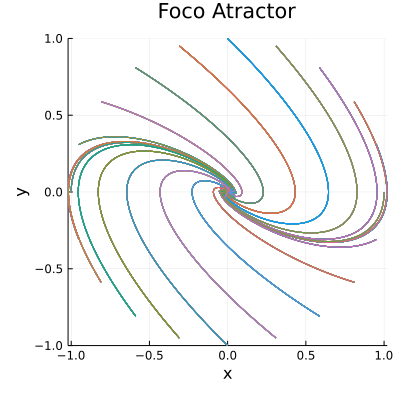

In [10]:
function spiral1!(du,u,p,t)
    du[1] = 2*u[2]
    du[2] = -1*u[1]-2*u[2]
    return 
end    

u0_arr = vec([[cos(i*pi/10);sin(i*pi/10)] for i=1:20, j=1:20])
prob = ODEProblem(spiral1!, u0_arr[1], (0,5.0))
sol = solve(EnsembleProblem(prob,prob_func=prob_func),
    EnsembleThreads(),trajectories=length(u0_arr))
p1 = plot(sol,vars=(1,2),arrows=true,legend=false,xlabel="x",ylabel="y",
    size=(400,400),fmt=:png,title="Foco Atractor")

Este tipo de punto fijo se conoce como **foco atractor** o espiral. Un nodo repulsor es igual con el flujo escapando de la fuente en lugar de yendo hacia el sumidero.

Que paso? En este caso no tenemos ninguna autodirección porque todas las trayectorias se mueven en espiral hacia el punto fijo. Podemos reconocer acá el retrato de fase del oscilador amortiguado. 

Pero es posible diagonalizar en este caso y extraer los autovalores? Curiosamente si, pero tanto los autovalores como los autovectores son complejos. Puede verificarse que (tarea para los que manejan complejos)

${\bf A}\bf{v_1}=\begin{pmatrix}0 & 2\\-1 & -2\end{pmatrix}\begin{pmatrix}2\\-1-i\end{pmatrix}=\begin{pmatrix}-2-2i\\2i\end{pmatrix}=(-1-i)\begin{pmatrix}2\\-1-i\end{pmatrix}=\lambda_1 \bf{v_1}$

${\bf A}\bf{v_2}=\begin{pmatrix}0 & 2\\-1 & -2\end{pmatrix}\begin{pmatrix}2\\-1+i\end{pmatrix}=\begin{pmatrix}-2+2i\\-2i\end{pmatrix}=(-1+i) \begin{pmatrix}2\\-1+i\end{pmatrix}=\lambda_2\bf{v_2}$

Vamos a dejar a un lado por ahora los autovectores complejos. Lo que nos interesan son los autovalores que son siempre complejos conjugados $\lambda=-1\pm i$. El hecho que sean complejos conjugados tiene sentido porque antes teniamos dos autovalores que eran dos números reales independientes. Ahora no tenemos dos números complejos independientes sino que seguimos teniendo dos numeros reales independientes, pero que corresponden a la parte real y a la parte imaginaria de los autovalores complejos conjugados. El número de "grados de libertad" (o más formalmente el rango) de la matriz sigue siendo dos.

Pero qué significa en términos geométricos que tengamos complejos conjugados? 

Si recordamos que la solucion en el sistema diagonalizado se puede escribir bajo la forma $e^{\lambda t}$ esto equivale a preguntarnos que significa que tengamos una solución con una exponencial compleja con la variable temporal.

La parte real del autovalor va a tener la misma acción que en los casos anteriores, si es positiva vamos a tener un crecimiento y si es negativa un decrecimiento exponencial de la variable. 

La parte imaginaria es la responsable de la oscilación ya que la exponencial de un número imaginario corresponde a el ángulo en el plano complejo y si eso evoluciona linealmente en el tiempo tenemos una oscilación. O un poco más formalmente podemos recurrir a la fórmula de Euler: $e^{it}=cos(t)+isin(t)$.

Por ejemplo para el primer autovalor, la ecuación en el sistema diagonalizado quedaría:

$\chi(t)=\chi_0 e^{\lambda_1 t} = \chi_0 e^{-t}e^{-it} = \chi_0 e^{-t}(cos(t)+i sin(t))$

El hecho que esta solución sea compleja no deberia preocuparnos porque para diagonalizar tuvimos que usar los autovectores complejos y cuando volvemos a las variables originales la solucion de $x$ e $y$ es real. Pero no nos ibamos a preocupar mas por las expresiones analíticas. La escribimos acá unicamente para mostrar que **la consecuencia de tener autovalores complejos es que las soluciones son oscilatorias**. 

Finalmente puede suceder que la parte real del autovalor sea cero y tengamos un autovalor puramente imaginario (como es el caso de un oscilador armónico sin disipación), pero vamos a dejar pendiente este caso particular, asi como aquellos en los que un autovalor se hace cero, ya que más adelante vamos a ver que están asociados a bifurcaciones en los flujos 2D.

### Diagonalización

El procedimiento que explicamos con más detalle para la matriz simétrica y que queda resumido en:

$\bf{T}^{-1}\bf{A}\bf{T}=\begin{pmatrix}\lambda_1 & 0\\0 & \lambda_2\end{pmatrix}$

y que como vimos se aplica también a transformaciones que no son simplemente rotaciones e incluso con autovalores complejos, se puede generalizar para todas matrices, con el requisito de que los dos autovectores sean diferentes (que no apunten en la misma dirección) porque en ese caso no puede calcularse la inversa. Este procedimiento se conoce como **diagonalización** porque transforma la matriz $\bf{A}$ (con autovalores diferentes) en una matriz diagonal con los autovectores sobre la diagonal. 

El procedimiento no es más que una **transformación lineal** por lo tanto **no cambia las características del flujo: y su tipo (nodo atractor/repulsor, punto silla o foco atractor/repulsor) va a estar completamente determinado por los autovalores**, y va a ser el mismo antes y después de diagonalizar.

Si bien no vamos a necesitar diagonalizar la matriz $\bf{A}$, toda esta larga introducción con ejemplos es para mostrar que **en un sistema dinámico lineal los autovalores van a determinar las características topológicas del punto fijo**. Como dato adicional los autovectores me van a dar información local de la organización del flujo en torno al punto fijo (por ejemplo en el caso de los puntos silla la dirección de las "divisorias de aguas"). Vamos a pasar ahora a los métodos numéricos para determinar el tipo de punto fijo y la organización del flujo en su entorno.

# Autovalores y Autovectores

Podemos calcular los autovalores sin pasar por los autovectores usando la siguiente estrategia. Partiendo de la definicion de los autovectores y autovalores que son aquellos que cumplen

$\bf{A}\bf{v}=\lambda \bf{v}$

$\bf{A}\bf{v}=\lambda \bf{I} \bf{v}$

donde en el ultimo paso $\bf{I}$ usamos la matriz identidad. Algo legitimo porque la matriz identidad multiplicada por cualquier vector es igual a ese vector. La última ecuación matricial puede escribirse como:


$(\bf{A}-\lambda \bf{I} )\bf{v}=\bf{0}$

donde $\bf{0}$ es el vector nulo. Ahora bien para que una matriz por un vector (el autovector) me de el vector nulo hay dos posibilidades, que el autovector sea nulo (posibilidad que no nos interesa) o que la matriz sea **singular**. La interpretación geométrica de que una matriz sea **singular** es que aplicada como transformacion lineal colapsa todo el plano en una recta. En ese caso va a existir un vector $\bf{v}$ perpendicular a esa recta que se anula y se cumple la ecuación. Esa es la posibilidad que nos interesa

Entonces, tenemos que buscar el valor de $\lambda$ tal que hace que $(\bf{A}-\lambda \bf{I})$ sea singular. **Las matrices singulares son aquellas cuyo determinante es cero**, por lo tanto lo que tenemos que hacer es resolver la ecuación característica para el autovalor:

$\begin{vmatrix}\bf{A}-\lambda \bf{I}\end{vmatrix}=0$

que es una ecuación cuadrática en $\lambda$

Para el caso de matrices de 2x2 la ecuacion caracteristica se puede escribir en función de la traza y el determinante de $\bf{A}$. En efecto:

$\begin{vmatrix}\bf{A}-\lambda \bf{I}\end{vmatrix}=\begin{vmatrix}a-\lambda & b\\c & d-\lambda\end{vmatrix}=(a-\lambda)(d-\lambda)-bc=\lambda^2-(a+d)\lambda+ad-bc$

pero $(a+d)$ es la **traza** de $\bf{A}$ (suma de los elementos de la diagonal) que vamos a notar con $\tau$ y $ad-bc$ su determinante. La ecuación característica queda entonces expresada en términos de esas dos magnitudes:

$\lambda^2-\tau\lambda+\Delta=0$

donde abreviamos $\tau=\tau(\bf{A})$  y $\Delta=|\bf{A}|$. Por lo tanto los dos autovalores de la matriz son:

$\lambda_1 = \displaystyle\frac{\tau+\sqrt{\tau^2-4\Delta}}{2} \quad \quad \lambda_2 = \displaystyle\frac{\tau-\sqrt{\tau^2-4\Delta}}{2}$ 

Vamos a revisitar las clases de puntos fijos pero ahora mostrando como calcular los autovectores y autovalores numéricamente.

## Nodo atractor

en el caso en el que la matriz ${\bf A}$ tiene dos autovalores reales negativos tenemos un nodo atractor. Por ejemplo:

$\dot{x} = -x+y$

$\dot{y} = x-2y$

La matriz en este caso es

${\bf A} =\begin{pmatrix}-1 & 1\\1 & -2\end{pmatrix}$

La traza es -3 y el determinante 1. Por lo tanto
sus autovalores son ambos reales negativos $\lambda_1=(-3+\sqrt{5})/2=-0.38197$ $\lambda_2=(-3+\sqrt{5})/2=-2.61803$

Los autovalores los podemos calcular numericamente tambien usando la funcion *eig* del modulo de algebra lineal de numpy

In [11]:
# Definimos la matriz
A = [-1 1; 1 -2]

2×2 Matrix{Int64}:
 -1   1
  1  -2

In [12]:
# sus autovalores
eigen(A).values

2-element Vector{Float64}:
 -2.618033988749895
 -0.38196601125010515

In [13]:
# sus autovectores
av = eigen(A).vectors

2×2 Matrix{Float64}:
 -0.525731  -0.850651
  0.850651  -0.525731

Vamos a integrar ahora el flujo y dibujar los autovectores como flechas indicando las autodirecciones invariantes del flujo. Vamos a tomarnos la licencia de usar la matriz $\bf{A}$ como una variable global y definirla cada vez para ahorrar notacion y definimos una funcion simple "out of place"

In [14]:
#definimos la ecuacion diferencial lineal general
flinear(u,p,t) = A*u

flinear (generic function with 1 method)

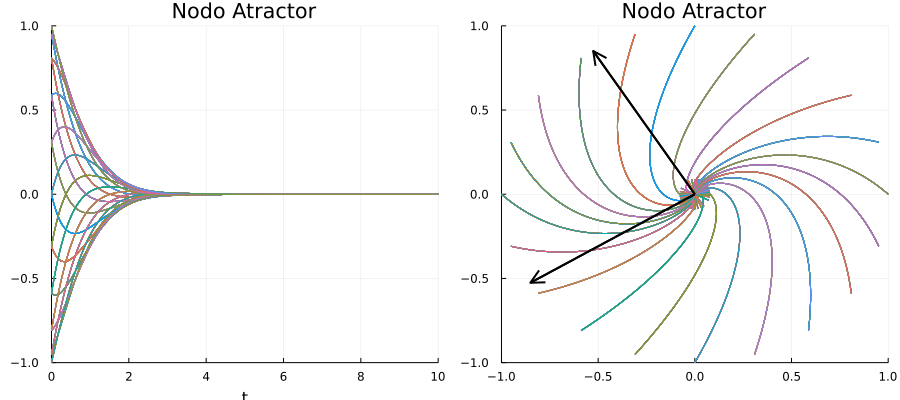

In [18]:
prob = ODEProblem(flinear, [0.2;0.2], (0,10))
function prob_func(prob,i,repeat)
  remake(prob,u0=u0_arr[i])
end
sol = solve(EnsembleProblem(prob,prob_func=prob_func),
    EnsembleThreads(),trajectories=length(u0_arr))
p1 = plot(sol,vars=(0,1))
p2 = plot(sol,vars=(1,2),arrow=true)
plot!(p2,[0,av[1,1]],[0,av[2,1]],arrow=true,linewidth=2,color=:black)
plot!(p2,[0,av[1,2]],[0,av[2,2]],arrow=true,linewidth=2,color=:black)
plot(p1,p2,layout=(1,2),size=(900,400),fmt=:png,title="Nodo Atractor")

Notar que en este caso elegimos una matriz simétrica por eso tenemos los ejes perpendiculares entre si, pero rotados.

## Foco atractor

en el caso en el que la matriz ${\bf A}$ tiene dos autovalores complejos (conjugados) con parte real negativa tenemos un foco (espiral) atractor. Un ejemplo:

$\dot{x} = -x+-y$

$\dot{y} = x-2y$

La matriz en este caso es

${\bf A}=\begin{pmatrix}-1 & -1\\1 & -2\end{pmatrix}$

En este caso la traza sigue siendo $\tau=-3$ pero el determinante es $\Delta=3$
por lo tanto discriminante $\tau^2-4\Delta$ es negativo y los autovalores son complejos conjugados.
$\lambda_1=(-3+\sqrt{3}j)/2 = -1.5+0.866j$ , y 
$\lambda_2=(-3-\sqrt{3}j)/2 = -1.5+0.866j$

In [16]:
A = [-1 -1; 1 -2]
eigen(A).values

2-element Vector{ComplexF64}:
 -1.5 - 0.8660254037844385im
 -1.5 + 0.8660254037844385im

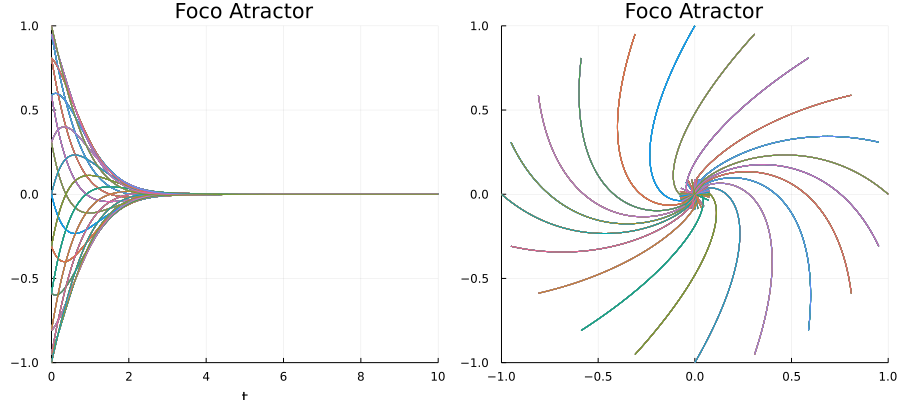

In [19]:
sol = solve(EnsembleProblem(prob,prob_func=prob_func),
    EnsembleThreads(),trajectories=length(u0_arr))
p1 = plot(sol,vars=(0,1))
p2 = plot(sol,vars=(1,2),arrow=true)
plot(p1,p2,layout=(1,2),size=(900,400),fmt=:png,title="Foco Atractor")

## Punto Silla (Saddle)

en el caso en el que la matriz ${\bf A}$ tiene un autovalor positivo y el otro negativo tenemos un punto silla. Un ejemplo:

$\dot{x} = x+y$

$\dot{y} = x-2y$

La matriz en este caso es

${\bf A}=\begin{pmatrix}1 & 1\\1 & -2\end{pmatrix}$

La traza es ahora $\tau=-1$ y el determinante es negativo $\Delta=-3$
Los autovalores: 1.3027 y -2.3027

SIEMPRE que el Determinante es negativo los autovalores son uno positivo y otro negativo porque estamos sumando y restando a $\tau$ un numero que es mayor a $\tau$ (la raiz del discriminante). Se puede mostrar que el recíproco es cierto, por lo tanto **el punto fijo va a ser un punto silla si y sólo si el determinante de la matriz es negativo**.

Esto tiene una interpretación geométrica muy interesante. La significado geométrico del determinante de una matriz $\bf{A}$ como transformación lineal es que equivale al área de un cuadrado unidad tranformado por $\bf{A}$. En el caso de los focos y los nodos el area de transforma si perder su orientación ya sea expandiéndose, contrayéndose o rotando. Pero que el determinante sea negativo para el caso del punto silla implica que el area esta dada vuelta, con la orientación invertida y esto es algo característico del punto silla. Pero atencion esto no implica que esa inversión este en el flujo, recordar que se refiere a como es la orientación de los vectores del campo vector con respecto a las posiciones.

In [20]:
A = [1 1; 1 -2]
eigen(A).values

2-element Vector{Float64}:
 -2.302775637731995
  1.3027756377319946

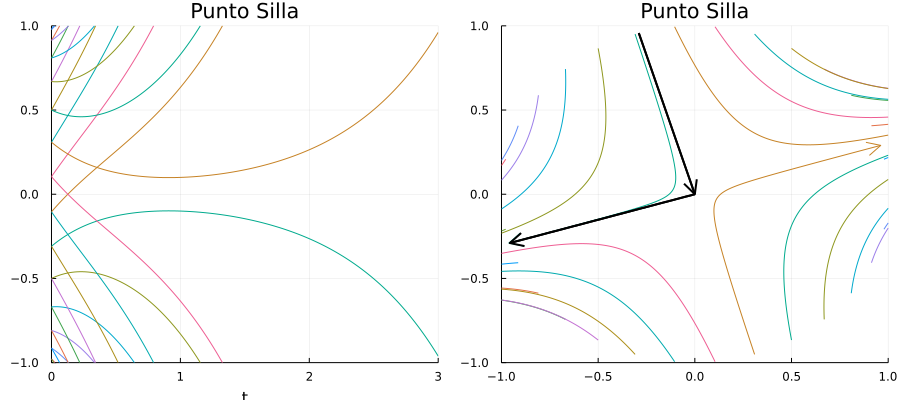

In [21]:
u0_arr = vec([[cos(i*pi/15);sin(i*pi/15)] for i=1:30])
prob = ODEProblem(flinear, [0.2;0.2], (0,3))
sol = solve(EnsembleProblem(prob,prob_func=prob_func),
    EnsembleThreads(),trajectories=length(u0_arr))
p1 = plot(sol,vars=(0,1),ylims=(-1,1))
p2 = plot(sol,vars=(1,2),arrow=true,xlims=(-1,1),ylims=(-1,1))
av = eigen(A).vectors
plot!(p2,[av[1,1],0],[av[2,1],0],arrow=true,linewidth=2,color=:black)
plot!(p2,[0,av[1,2]],[0,av[2,2]],arrow=true,linewidth=2,color=:black)
plot(p1,p2,layout=(1,2),size=(900,400),fmt=:png,title="Punto Silla")

 Los autovectores (columna) 
 
$\begin{pmatrix}0.9571 \\0.2898\end{pmatrix} \quad \begin{pmatrix}-0.2898\\0.9571\end{pmatrix}$

corresponden a los autovalores negativo (atraccion) y positivo (repulsor) y como vectores en el plano $(x,y)$ e indican las direcciones a lo largo de las cuales el flujo 2D es atraido y repelido respectivamente

## Nodo y Foco Repulsor
Cambiando el signo de los flujos de arriba  se pueden obtener un nodo y foco repulsor. Al cambiar el signo de $a,b,c,d$ cambia de signo la Traza pero no el Determinante. 

De forma más general **los nodos y focos van a ser atractores cuando la parte real del autovalor sea negativa y repulsores cuando la parte real del autovalor sea positiva**.

Pero no es dificil determinar el signo de la parte real ya que sabemos que sí o sí el determinante tiene que ser positivop para tener un foco o un nodo ya que si es negativo tenemos un punto silla. Si el determinante es positivo la raiz del discriminante $\sqrt{\tau^2-4\Delta}$ va a ser o imaginaria o menor en valor absoluto que $\tau$. Por lo tanto en ninguno de los dos casos va a cambiar el signo de $\tau$. Tenemos entonces un segundo resultado notable:

**Cunando el determinante es positivo el signo de la traza es igual al signo de la parte real del autovalor y es el que determina la estabilidad del nodo/foco. Traza negativa corresponde a un atractor y traza positiva a un repulsor**

## Centro

Para el caso particular en el que la parte real del autovalor se hace cero tenemos un centro, esto sucede para un valor especifico de parametros y no es generico como los puntos anteriores (o estructuralmente estable). Cualquier perturbacion de un centro me lleva a un foco atractor a uno repulsor. De hecho podemos ver al centro como el cambio de estabilidad de un foco repulsor a uno atractor. Notar que en este caso la traza es cero por lo tanto no es ni atractor ni repulsor.

Un ejemplo clasico de un repulsor es el del oscilador armonico sin friccion

$\dot{x} = y$

$\dot{y} = -x$

La matriz en este caso es

${\bf A}=\begin{pmatrix}0 & 1\\-1 & 0\end{pmatrix}$

y tiene como autovalores: j y -j

In [22]:
A = [0 1; -1 0]
eigen(A).values

2-element Vector{ComplexF64}:
 0.0 - 1.0im
 0.0 + 1.0im

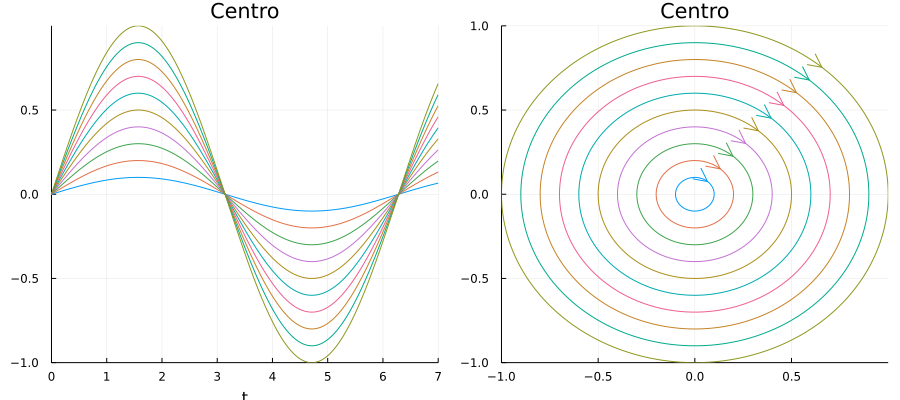

In [23]:
u0_arr=[[0;i*0.1] for i=1:10]
prob = ODEProblem(flinear, u0_arr[1], (0,7.0))
sol = solve(EnsembleProblem(prob,prob_func=prob_func),
    EnsembleThreads(),trajectories=length(u0_arr))
p1 = plot(sol,vars=(0,1))
p2 = plot(sol,vars=(1,2),arrow=true)
plot(p1,p2,layout=(1,2),size=(900,400),fmt=:png,title="Centro")

# Clasificacion de los sistemas lineales 

Como vimos a partir de la Traza y el Determinante podemos clasificar los puntos fijos segun su tipo y estabilidad. Vamos a explorar eso en un grafico interactivo. Para simplificar los manipuladores vamos a ajustar la traza y el determinante de forma independiente. A partir de esos dos valores y de un valor libre de $d$ podemos determinar los valores de $a$ y $b$. La matriz entonces va a ser

$\begin{pmatrix}\tau - d & 1\\(\tau-d)d-\Delta & d\end{pmatrix}$

Puede resultar un poco rebuscado pero es mas intuitivo ajustar la traza y el determinante, sobre todo mirando el grafico de la derecha (a la izquierda esta el flujo), que controlando los elementos de la matriz ($a,b,c,d$) de forma independiente. De todas formas en el grafico donde se muestra la ubicacion del punto en el grafico de traza y determinante se muestran tambien los valores de la matriz.

Notar que lo que influye en la estabilidad son solo la Traza y el Determinante, el elemento $d$ lo que hace es rotar el flujo o cambiar la velocidad de las trayectorias.

In [24]:
# ESTO ES INTERACTIVO EN EL NAVEGADOR
traza = -0.5; determ = 0.5; d=1.0
@manipulate throttle=0.5 for traza=-1.8:0.05:1.8, determ=-1:0.02:1, d=-1:0.05:1
    b=1.0;
    a=traza-d;
    c=(a*d-determ)/b
    A = round.([a b; c d],digits=2)
    classification_linear(A)
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["traza"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 73, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
37, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000008fc64c90, Task (runnable) @0x000000008fc64c90), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.8\",\"-1.75\",\"-1.7\",\"-1.65\",\"-1.6\",\"-1.55\",\"-1.5\",\"-1.45\",\"-1.4\",\"-1.35\",\"-1.3\",\"-1.25\",\"-1.2\",\"-1.15\",\"-1.1\",\"-1.05\",\"-1.0\",\"-0.95\",\"-0.9\",\"-0.85\",\"-0.8\",\"-0.75\"

# Nulclinas y campo vector

Finalmente veamos como se modifica el flujo dado por el campo vector al modificar la matriz.  Como en el caso anterior vamos a modificar la traza el determinante y el elemento $d$ de la matriz.

In [25]:
function flinearin!(du,u,p,t)
    (a,b,c,d)=p
    du[1]=a*u[1]+b*u[2]
    du[2]=c*u[1]+d*u[2]
    du
end

flinearin! (generic function with 1 method)

In [26]:
# ESTO ES INTERACTIVO EN EL NAVEGADOR
xlims=[-1.0,1.0];ylims=[-1.0,1.0]; Ngrid=7
xrange = xlims[2]-xlims[1]
yrange = ylims[2]-ylims[1]
#traza=-0.3;determ=0.2;d=-0.5
@manipulate throttle=0.5 for traza=-2:0.02:2, determ=-1:0.01:1, d=-1:0.01:1
    b=1.0;
    a=traza-d;
    c=(a*d-determ)/b
    A = [a b; c d]
    flux2d_nullclines(flinearin!,[a,b,c,d];vectorfield=true,size=(400,400))
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["traza"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 201, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
101, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000008730f210, Task (runnable) @0x000000008730f210), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-2.0\",\"-1.98\",\"-1.96\",\"-1.94\",\"-1.92\",\"-1.9\",\"-1.88\",\"-1.86\",\"-1.84\",\"-1.82\",\"-1.8\",\"-1.78\",\"-1.76\",\"-1.74\",\"-1.72\",\"-1.7\",\"-1.68\",\"-1.66\",\"-1.64\",\"-1.62\",\"-1.6\",\